In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("34-gym_crowdedness.csv")

In [3]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


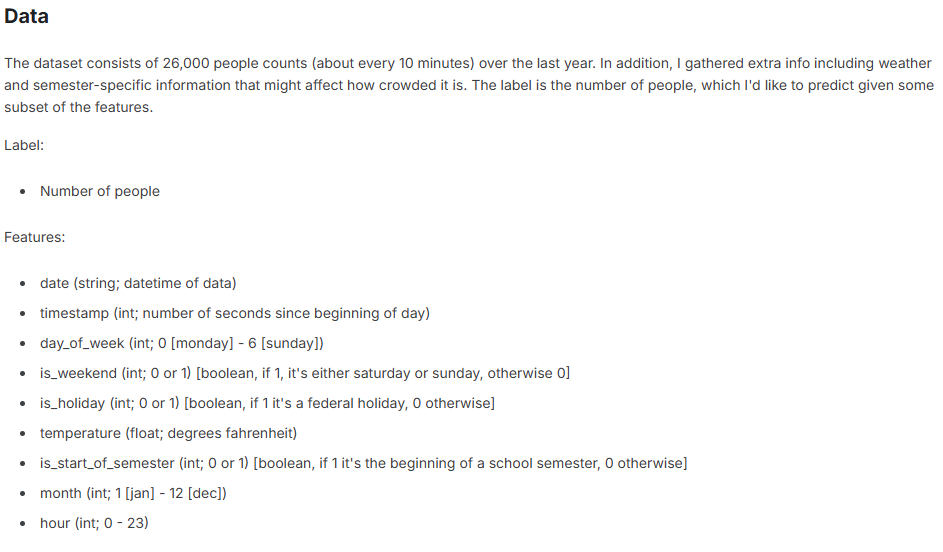

In [5]:
df.shape

(62184, 11)

In [6]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [7]:
df.isnull().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

In [8]:
df['date'] = pd.to_datetime(arg = df['date'], utc=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   number_people         62184 non-null  int64              
 1   date                  62184 non-null  datetime64[ns, UTC]
 2   timestamp             62184 non-null  int64              
 3   day_of_week           62184 non-null  int64              
 4   is_weekend            62184 non-null  int64              
 5   is_holiday            62184 non-null  int64              
 6   temperature           62184 non-null  float64            
 7   is_start_of_semester  62184 non-null  int64              
 8   is_during_semester    62184 non-null  int64              
 9   month                 62184 non-null  int64              
 10  hour                  62184 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(9)
memory usage: 5.2 M

In [10]:
df['date']

0       2015-08-15 00:00:11+00:00
1       2015-08-15 00:20:14+00:00
2       2015-08-15 00:30:15+00:00
3       2015-08-15 00:40:16+00:00
4       2015-08-15 00:50:17+00:00
                   ...           
62179   2017-03-19 01:42:28+00:00
62180   2017-03-19 01:52:35+00:00
62181   2017-03-19 02:02:40+00:00
62182   2017-03-19 02:12:47+00:00
62183   2017-03-19 02:22:51+00:00
Name: date, Length: 62184, dtype: datetime64[ns, UTC]

- Bizim dataframe de zaten saat, ay bilgisi var. Biz de burada sadece yılı alacağız.

In [11]:
df['year'] = df['date'].dt.year

In [12]:
df.drop('date', axis=1, inplace=True)

In [13]:
df.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
0,37,61211,4,0,0,71.76,0,0,8,17,2015
1,45,62414,4,0,0,71.76,0,0,8,17,2015
2,40,63015,4,0,0,71.76,0,0,8,17,2015
3,44,63616,4,0,0,71.76,0,0,8,17,2015
4,45,64217,4,0,0,71.76,0,0,8,17,2015


# EDA

- Bu kısımlarda atıl hoca EDA yaparken data karışık gelebilir aklınıza gelmeyebilir ne ile neyi grafikte karşılaştırmak. GPT'ye seaborn kullanarak EDA yapmam için yardım et diyerek yardım alabilirsiniz dedi.

<Axes: xlabel='number_people', ylabel='Count'>

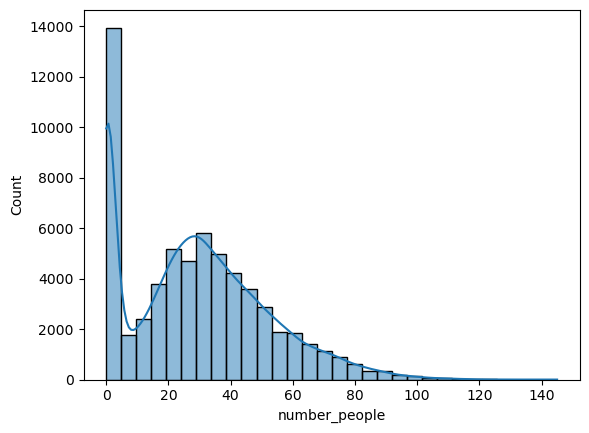

In [14]:
sns.histplot(df["number_people"], bins=30, kde=True)   # histogram + yoğunluk

<Axes: xlabel='number_people'>

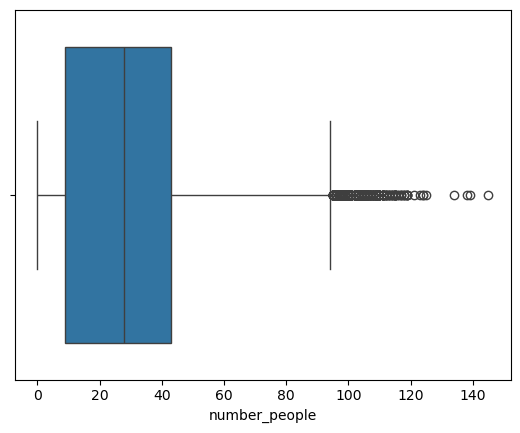

In [15]:
sns.boxplot(x=df["number_people"])                     # boxplot (outlier kontrolü

<Axes: xlabel='number_people'>

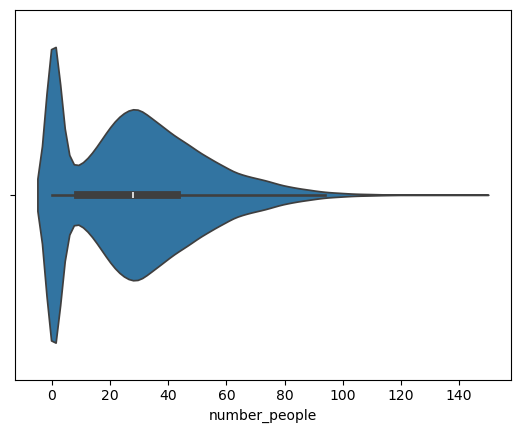

In [16]:
sns.violinplot(x=df["number_people"])                  # dağılımın şeklini görmek

<Axes: xlabel='day_of_week', ylabel='number_people'>

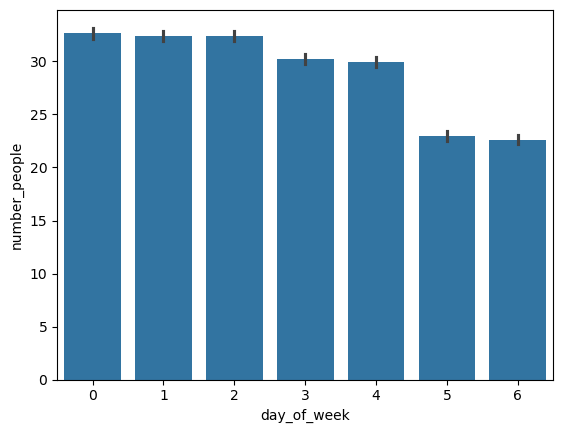

In [17]:
sns.barplot(x="day_of_week", y="number_people", data=df) # haftalık ortalamalar

<Axes: xlabel='hour', ylabel='number_people'>

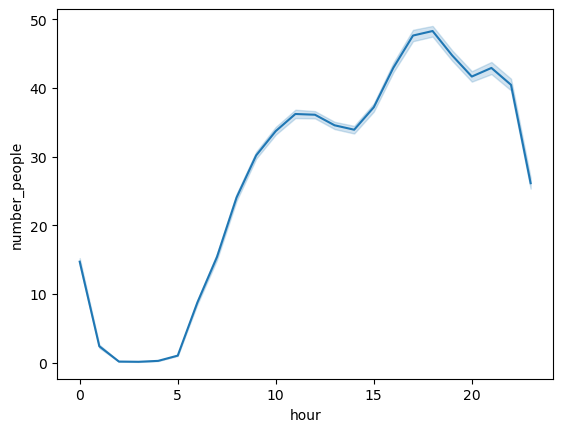

In [18]:
sns.lineplot(x="hour", y="number_people", data=df)     # saat bazlı trend

<Axes: xlabel='month', ylabel='number_people'>

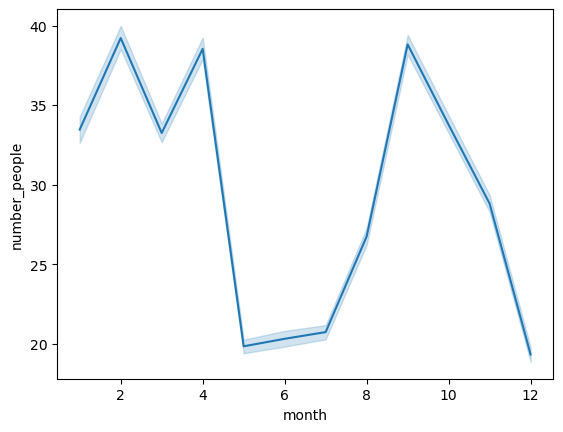

In [19]:
sns.lineplot(x="month", y="number_people", data=df, estimator="mean")

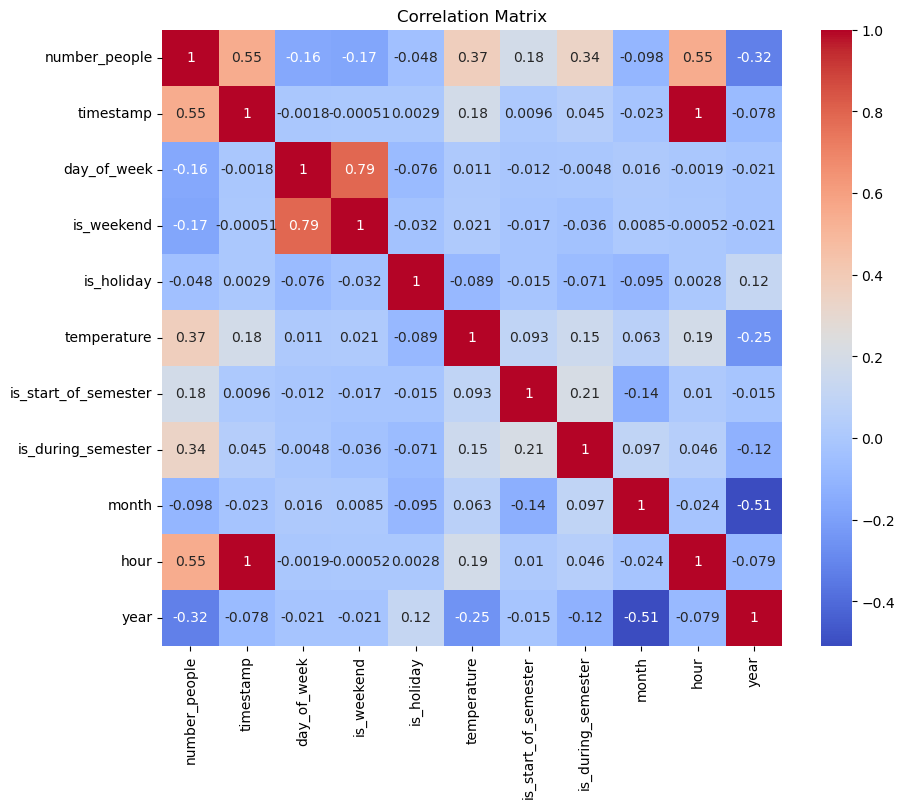

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

- timestap ile diğer zaman değişkenleri arasında korelasyon ilişkisi var. O yüzden onu drop edebiliriz.

In [21]:
df.drop('timestamp',axis=1, inplace=True)

# Model Training

In [22]:
X = df.drop('number_people', axis=1)
y = df.number_people

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=36)

In [25]:
from sklearn.preprocessing import StandardScaler    # Normalde RandomForest için yapmaya gerek yok ama diğer algoritmaları da yapacağız.

In [26]:
scaler = StandardScaler()

In [27]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [30]:
def calculate_model_metrics(true, pred):
    mae = mean_absolute_error(true,pred)
    mse = mean_squared_error(true,pred)
    r2 = r2_score(true,pred)

    return mae, mse, r2

In [36]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso": Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor"  : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor()
}

In [39]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = calculate_model_metrics(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = calculate_model_metrics(y_test, y_test_pred)

    print(list(models.values())[i])

    print("Evaluation for Training Set")
    print("RMSE :", model_train_rmse)
    print("Mean Absolute Error :", model_train_mae)
    print("R2 Score :", model_train_r2)

    print("-----------------------------")
    
    print("Evaluation for Test Set")
    print("RMSE :", model_test_rmse)
    print("Mean Absolute Error :", model_test_mae)
    print("R2 Score :", model_test_r2)

    print("-----------------------------")
    print("\n")

LinearRegression()
Evaluation for Training Set
RMSE : 205.01253339635147
Mean Absolute Error : 10.730447299270867
R2 Score : 0.6018396461899328
-----------------------------
Evaluation for Test Set
RMSE : 208.48753188839893
Mean Absolute Error : 10.760708655163386
R2 Score : 0.5947825064132757
-----------------------------


Lasso()
Evaluation for Training Set
RMSE : 212.0975394889527
Mean Absolute Error : 10.938023097251817
R2 Score : 0.5880796653446505
-----------------------------
Evaluation for Test Set
RMSE : 214.91696720809472
Mean Absolute Error : 10.940616520646095
R2 Score : 0.5822862211830411
-----------------------------


Ridge()
Evaluation for Training Set
RMSE : 205.01253358324047
Mean Absolute Error : 10.730456394067392
R2 Score : 0.6018396458269707
-----------------------------
Evaluation for Test Set
RMSE : 208.48740127020724
Mean Absolute Error : 10.760715912400274
R2 Score : 0.594782760283499
-----------------------------


KNeighborsRegressor()
Evaluation for Traini

In [40]:
#hyperparameter tuning

knn_params = {"n_neighbors" : [2,3,10,20,40,50]}
rf_params = {
        "max_depth" : [5,8,10,15,None],
        "max_features" : ["sqrt", "log2", 5, 7, 10],
        "min_samples_split" : [2, 8, 12, 20],
        "n_estimators" : [100, 200, 500, 1000]
}

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
randomcv_models = [
    ("KNN", KNeighborsRegressor(), knn_params),
    ("RF", RandomForestRegressor(), rf_params)
        ]

In [43]:
import warnings
warnings.filterwarnings('ignore')
for name, model, params in randomcv_models:
    randomcv = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter = 100, cv = 3, n_jobs = -1, verbose=3)
    randomcv.fit(X_train, y_train)
    print("best params for :", name, randomcv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
best params for : KNN {'n_neighbors': 2}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
best params for : RF {'n_estimators': 500, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}


In [45]:
models = {
    "K-Neighbors Regressor"  : KNeighborsRegressor(n_neighbors=2),
    "Random Forest Regressor" : RandomForestRegressor(n_estimators=500, min_samples_split=2, max_features=7, max_depth=None)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = calculate_model_metrics(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = calculate_model_metrics(y_test, y_test_pred)

    print(list(models.values())[i])

    print("Evaluation for Training Set")
    print("RMSE :", model_train_rmse)
    print("Mean Absolute Error :", model_train_mae)
    print("R2 Score :", model_train_r2)

    print("-----------------------------")
    
    print("Evaluation for Test Set")
    print("RMSE :", model_test_rmse)
    print("Mean Absolute Error :", model_test_mae)
    print("R2 Score :", model_test_r2)

    print("-----------------------------")
    print("\n")

KNeighborsRegressor(n_neighbors=2)
Evaluation for Training Set
RMSE : 29.395113490167248
Mean Absolute Error : 3.5305320713104207
R2 Score : 0.9429109596684767
-----------------------------
Evaluation for Test Set
RMSE : 48.05415147941681
Mean Absolute Error : 4.68136256432247
R2 Score : 0.9066016915133831
-----------------------------


RandomForestRegressor(max_features=7, n_estimators=500)
Evaluation for Training Set
RMSE : 21.901239086411735
Mean Absolute Error : 3.1689988423878326
R2 Score : 0.9574650146551491
-----------------------------
Evaluation for Test Set
RMSE : 40.65802675351362
Mean Absolute Error : 4.327572601870956
R2 Score : 0.9209768394972423
-----------------------------


